# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement,
> Given clinical parameteres about a patient, can we predict whether or not they have heart disease ?

## 2. Data

The original data came from cleveland database from UCI Machine Learning Repository.

There is also version of it available on Kaggle : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation 

> If we can reach 95%  accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create Data Dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
    * Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute



# Preparing the tools

 We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation.


In [55]:
# import all the tools that we need

# Regular EDA and Ploting Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load Data

In [56]:
df = pd.read_csv('heart-disease.csv')
df.shape # rows and columns

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal is to find about more and more about the data and become a subject matter expert on the dataset you're working on.

1. What question(s) are you trying to solve ?
2. What kind of data do we have and how do we treat different data types ?
3. What is missing in the data and how do you deal with it ? 
4. What are the outliners and whty do you care about them ? 
5. How can you add, change, remove features to get more out of it ? 

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [59]:
# Lets find out how many of class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

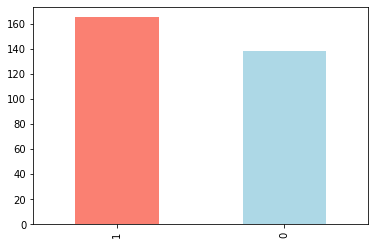

In [60]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
# Check if there is missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to SEX

In [64]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [65]:
# compare target value with column value
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


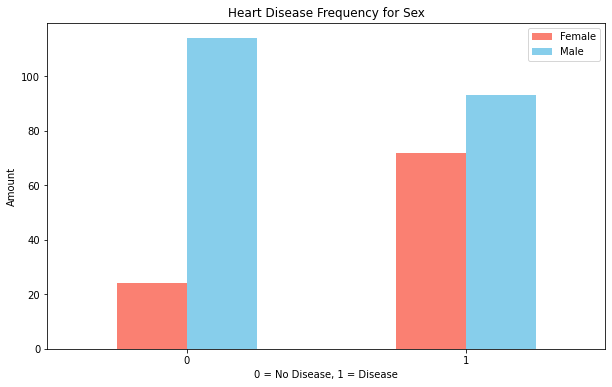

In [66]:
# create a plot of crosstab

pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6), color=['salmon', 'skyblue'])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Age V/s Maximum Heart Rate

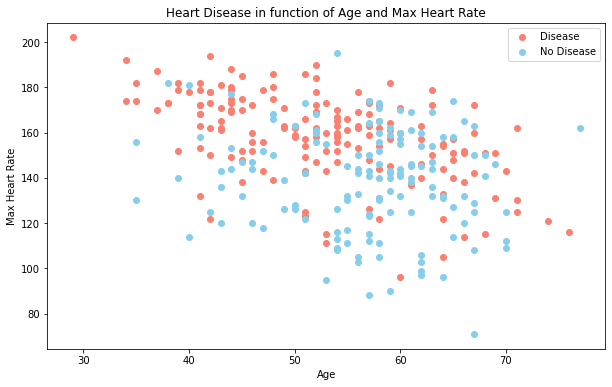

In [67]:
plt.figure(figsize=(10,6))


# creating a scatter plot

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# scatter with negative exaple

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='skyblue')
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

### Heart Disease frequency per Chest Pain Type


In [68]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


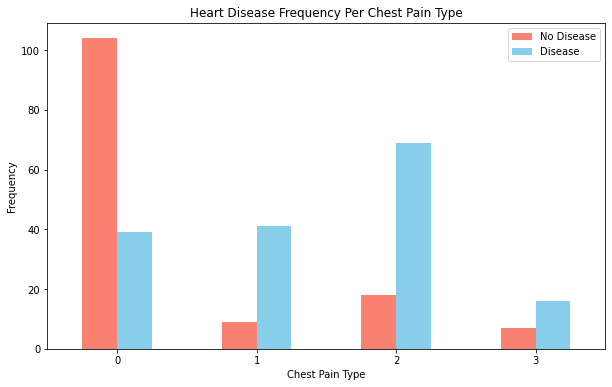

In [69]:
# create plot 
pd.crosstab(df.cp,df.target).plot(figsize=(10,6), kind="bar", color=['salmon','skyblue'])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [70]:
# make correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


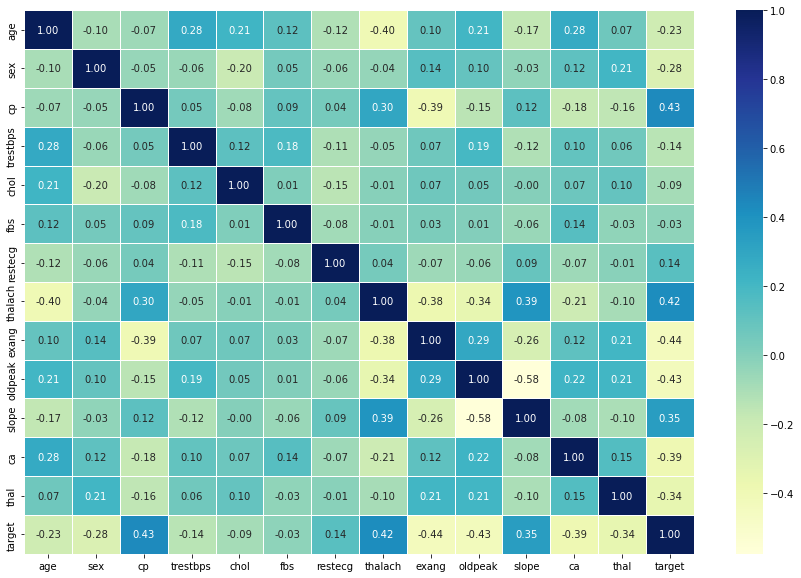

In [71]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# 5. Modelling 

In [72]:
# Split data into X and y 

X = df.drop("target", axis=1)
y = df['target']



In [73]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [74]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [75]:
# Split data into train and test sets
np.random.seed(42)

# split into train and tests
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

we'll use 3 machine learning models:
1. Logistic Regressor
2. K-Nearest Neighbours Classifier
3. RandomForestClassifier


In [76]:
# put models in a dictionaries
models = {
    "Logistic Regressor" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
}


# create a function and fit and score model in it
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates Model
    X_train : Training Data
    x_test : Testing Data
    y_train: training labels
    y_test: testing labels
    """
    
    # set random seed
    np.random.seed(42)
    
    # make a dictionary to keep model score
    model_score = {}
    
    for name, model in models.items():
        #fit model to the data
        model.fit(X_train,y_train)
        # Evaluate model and add scores to the end
        model_score[name] = model.score(X_test,y_test)
        
        
    return model_score


model_score = fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                            y_test = y_test
                           )
model_score

/Users/dhruvdabhi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regressor': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparision


<AxesSubplot:>

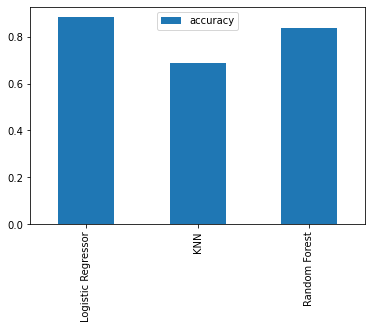

In [77]:
model_compare = pd.DataFrame(model_score,index=["accuracy"])
model_compare.T.plot.bar()

Let's look at the following

* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-validatin
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

### HyperParameter Tuning

In [78]:
# Let's tune KNN

train_scores =[]
test_scores = []
neighbors = range(1,21)

# create a different values of different neighbours
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the training scores
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test scores
    test_scores.append(knn.score(X_test,y_test))    
    

In [79]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [80]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


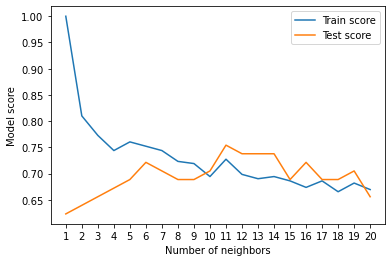

In [81]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## HypterParameters Tuning with RandomizedSearchCV

Going to tune:
* Logistic Regressor
* Random Forest 


with RandomizedSearchCV


In [82]:
# hyper parameter grid for logistic regression
log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    "solver" : ['liblinear']   
}


#hyperparameters grid for randomforestclassifier

rf_grid = {
    "n_estimators" : np.arange(50,1000,10),
    "max_depth" : [None,3,5,10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2)
}



In [83]:
# Tune LogisticRegression

np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [91]:
# find best hyper parametere
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [85]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [86]:
# tuning randomforestclassifier
np.random.seed(42)

#setup random parameter search for hyperparametere
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                           cv = 5,
                           n_iter=20,
                           verbose=True
                          )

# Fit randomforestclassifier

rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560,
       570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690,
       700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820,
       830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950,
       960, 970, 980, 990])},
                   verbose=True)

In [88]:
# find best hyper parametere
rs_rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 14,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [92]:
# Evaluate
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyper Parametere Tuning using GridSearchCV

we'll try to improve logistic regression model because it is the best performing model so far.

In [93]:
# Different HyperParameter for our Logistic Regression
log_reg_grid = {
    "C" : np.logspace(-4,4,30),
    "solver" : ['liblinear']   
}

# Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv = 5,
                         verbose=True)

# Fit grid hyper parameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [94]:
# check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [95]:
# Evaluate
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating out tuned machine learning model

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [97]:
# make prediction with model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [98]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

/Users/dhruvdabhi/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


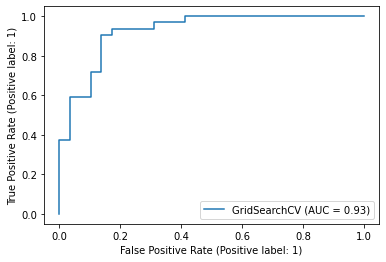

In [99]:
#plot roc and calculate auc 

plot_roc_curve(gs_log_reg,X_test,y_test)



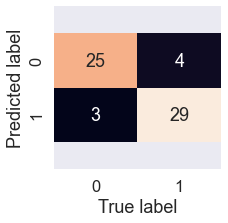

In [100]:
# confusion metrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [102]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate Evaluation Metrix using hyperparameters

In [103]:
# check best hyperparameteres
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [104]:
# create a new classifier with best parameters

clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")


In [107]:
# cross validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [109]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [110]:
# cross validated precision

cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [111]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [112]:
# cross validated recall


cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall


0.9212121212121213

In [113]:
# cross validated f1 score


cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1


0.8673007976269721

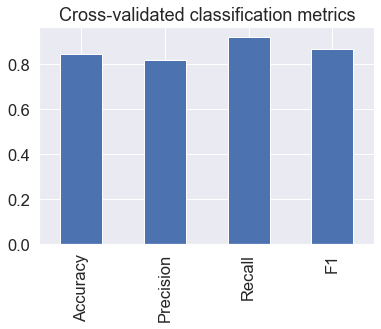

In [115]:
# visualise cross validated matrix

cv_metrics = pd.DataFrame(
                        {"Accuracy" : cv_acc,
                         "Precision" : cv_precision,
                         "Recall": cv_recall,
                         "F1":cv_f1},
                         index = [0]
                        )
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance
another way of asking : which features contributed most to the outcomes to the model and how did they contributed ? 

feature importance is different for all machine learning models

In [116]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [117]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044662,  0.66067038, -0.01156993, -0.00166374,
         0.04386106,  0.31275853,  0.02459361, -0.60413087, -0.56862799,
         0.4505163 , -0.63609901, -0.67663377]])

In [118]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672816664025417,
 'sex': -0.8604466164764594,
 'cp': 0.660670378971457,
 'trestbps': -0.011569931858994414,
 'chol': -0.0016637446649201797,
 'fbs': 0.04386106245399992,
 'restecg': 0.31275852888688666,
 'thalach': 0.024593614591211826,
 'exang': -0.6041308666006405,
 'oldpeak': -0.5686279913648149,
 'slope': 0.45051630416484045,
 'ca': -0.636099010407402,
 'thal': -0.6766337677461476}

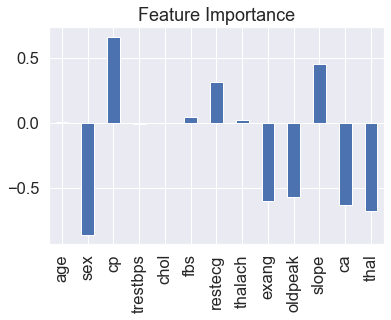

In [119]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# The End